In [ ]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
torch.manual_seed(2)

In [ ]:
X = torch.Tensor([[0,0], [0,1], [1,0], [1,1]])
Y = torch.Tensor([0, 1, 1, 0]).view(-1,1)

# Xor Gate Inmplementation Technique 1

**Function involves minimalistic changes from assignment 


> 1.   As per assignment directive we have to remove the final layer with TanH. 
> 2.   It has 11 filters/Kernel instead of 2 from original architecture
> 3.   Also the Bias is kept only on first layer to account for scenario wherein both inputs are 0 .
4. Bias for second layer is more or less redundant hence turned off 

1. ***Activation function*** -> TanH 
2. ***Number of parameters*** -> 44**

In [ ]:
import torch.nn as nn 
class XOR(nn.Module):
    def __init__(self, input_dim = 2, output_dim=1):
        super(XOR, self).__init__()
        self.lin1 = nn.Linear(input_dim, 11)
        self.lin2 = nn.Linear(11, output_dim,bias=False)
    
    def forward(self, x):
        x = self.lin1(x)
        x = F.tanh(x)
        x = self.lin2(x)
        # x = F.tanh(x)
        return x

model_tanH = XOR()
print(model_tanH)
from torchsummary import summary
summary(model_tanH, (2,2))

XOR(
  (lin1): Linear(in_features=2, out_features=11, bias=True)
  (lin2): Linear(in_features=11, out_features=1, bias=False)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 2, 11]              33
            Linear-2                 [-1, 2, 1]              11
Total params: 44
Trainable params: 44
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


**Training overview **

1.   **Epochs -> 2001**
2.   **Loss function -> L1 loss (original function )**
3.   **Learning Rate -> 0.03**



In [ ]:
epochs = 2001
L1loss = nn.L1Loss()
model= model_tanH
optimizer = torch.optim.Adam(model.parameters(), lr = 0.03)
all_losses = []
current_loss = 0
plot_every = 50

for epoch in range(epochs):

  # input training example and return the prediction
  yhat = model.forward(X)
  
  # calculate  loss
  loss = L1loss(yhat, Y)
  
  # backpropogate through the loss gradiants
  loss.backward()

  # update model weights
  optimizer.step()

  # remove current gradients for next iteration
  optimizer.zero_grad()

  # append to loss
  current_loss += loss
  if epoch % plot_every == 0:
      all_losses.append(current_loss / plot_every)
      current_loss = 0
  
  # print progress
  if epoch % 500 == 0:
    print(f'Epoch: {epoch} completed')

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 0 completed
Epoch: 500 completed
Epoch: 1000 completed
Epoch: 1500 completed
Epoch: 2000 completed


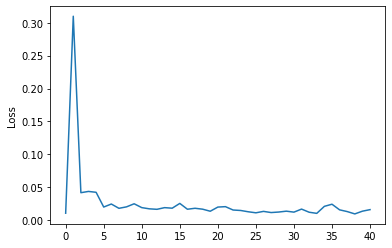

In [ ]:
import matplotlib.pyplot as plt
plt.plot(all_losses)
plt.ylabel('Loss')
plt.show()

In [ ]:
# show weights and bias
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

lin1.weight tensor([[-1.5208e+00, -2.0006e+00],
        [-1.5964e-07, -1.2799e-07],
        [-1.1001e+00,  2.6051e+00],
        [-1.9676e-04,  2.6334e-03],
        [ 1.8173e+00,  2.2731e+00],
        [ 5.1278e-01,  5.6524e-02],
        [-1.2326e+00, -4.2566e-01],
        [-2.3989e+00, -2.7036e+00],
        [-2.1762e-02, -1.2499e-02],
        [-2.3030e-08, -2.2871e-08],
        [ 1.4397e+00, -2.2079e-01]])
lin1.bias tensor([-2.8421e-02, -1.5363e-08,  4.2137e-01, -1.7499e-03, -6.4409e-02,
        -2.9361e-01,  8.4938e-01,  3.8597e-01,  2.4092e-02, -1.5308e-09,
        -2.7508e-01])
lin2.weight tensor([[-2.5552e-01, -3.8815e-09, -6.1091e-01, -3.0734e-05,  4.2372e-01,
         -7.4945e-02,  4.9904e-01, -5.5542e-01,  2.1959e-04, -5.9598e-09,
         -4.0211e-01]])


In [ ]:
# test input
input = torch.tensor([1., 0.])
out = model(input)
print(out.round())

input = torch.tensor([0., 1.])
out = model(input)
print(out.round())

input = torch.tensor([1., 1.])
out = model(input)
print(out.round())

input = torch.tensor([0., 0.])
out = model(input)
print(out.round())

tensor([1.], grad_fn=<RoundBackward>)
tensor([1.], grad_fn=<RoundBackward>)
tensor([-0.], grad_fn=<RoundBackward>)
tensor([0.], grad_fn=<RoundBackward>)


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


**So we see for input 0,0 we get output of -0 **


> So we try 2 approaches :
  1. We will first change the loss function as L1 loss is designed to penalize the residuals. So we replace it with the most simplistic MSE loss function which is differentiable as well 
  2. If that does not work we will try to replace Activation function from TanH to Sigmoid whose non linear output values always lies between 0 to 1 . We will not go with RELU because We have first off binary input and a single logic output. 



/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 0 completed
Epoch: 500 completed
Epoch: 1000 completed
Epoch: 1500 completed
Epoch: 2000 completed


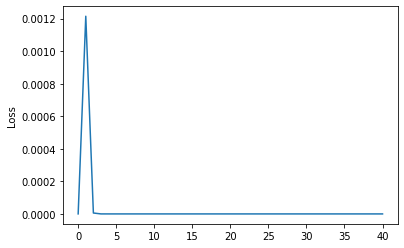

tensor([1.], grad_fn=<RoundBackward>)
tensor([1.], grad_fn=<RoundBackward>)
tensor([0.], grad_fn=<RoundBackward>)
tensor([0.], grad_fn=<RoundBackward>)


In [ ]:
epochs = 2001
mseloss = nn.MSELoss()
model= model_tanH
optimizer = torch.optim.Adam(model.parameters(), lr = 0.03)
all_losses = []
current_loss = 0
plot_every = 50

for epoch in range(epochs):

  # input training example and return the prediction
  yhat = model.forward(X)
  
  # calculate  loss
  loss = mseloss(yhat, Y)
  
  # backpropogate through the loss gradiants
  loss.backward()

  # update model weights
  optimizer.step()

  # remove current gradients for next iteration
  optimizer.zero_grad()

  # append to loss
  current_loss += loss
  if epoch % plot_every == 0:
      all_losses.append(current_loss / plot_every)
      current_loss = 0
  
  # print progress
  if epoch % 500 == 0:
    print(f'Epoch: {epoch} completed')

import matplotlib.pyplot as plt
plt.plot(all_losses)
plt.ylabel('Loss')
plt.show()

# test input
input = torch.tensor([1., 0.])
out = model(input)
print(out.round())

input = torch.tensor([0., 1.])
out = model(input)
print(out.round())

input = torch.tensor([1., 1.])
out = model(input)
print(out.round())

input = torch.tensor([0., 0.])
out = model(input)
print(out.round())



> **So simply changing the Loss function did not do good but it definitely smoothned the loss graph vs epoch bins so our estimation to use MSE loss was partly right**

**Next Step ** ->
 
> **We change the activation function in the model itself from TanH to Sigmoid**





XOR(
  (lin1): Linear(in_features=2, out_features=11, bias=True)
  (lin2): Linear(in_features=11, out_features=1, bias=False)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 2, 11]              33
            Linear-2                 [-1, 2, 1]              11
Total params: 44
Trainable params: 44
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------
Epoch: 0 completed


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 500 completed
Epoch: 1000 completed
Epoch: 1500 completed
Epoch: 2000 completed


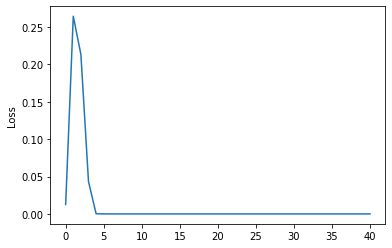

tensor([1.], grad_fn=<RoundBackward>)
tensor([1.], grad_fn=<RoundBackward>)
tensor([0.], grad_fn=<RoundBackward>)
tensor([0.], grad_fn=<RoundBackward>)


In [ ]:
import torch.nn as nn 
class XOR(nn.Module):
    def __init__(self, input_dim = 2, output_dim=1):
        super(XOR, self).__init__()
        self.lin1 = nn.Linear(input_dim, 11)
        self.lin2 = nn.Linear(11, output_dim,bias=False)
    
    def forward(self, x):
        x = self.lin1(x)
        x = F.sigmoid(x)
        x = self.lin2(x)
        # x = F.sigmoid(x)
        return x

model_sig = XOR()
print(model_sig)
from torchsummary import summary
summary(model_sig, (2,2))

epochs = 2001
mseloss = nn.MSELoss()
model= model_sig
optimizer = torch.optim.Adam(model.parameters(), lr = 0.03)
all_losses = []
current_loss = 0
plot_every = 50

for epoch in range(epochs):

  # input training example and return the prediction
  yhat = model.forward(X)
  
  # calculate  loss
  loss = mseloss(yhat, Y)
  
  # backpropogate through the loss gradiants
  loss.backward()

  # update model weights
  optimizer.step()

  # remove current gradients for next iteration
  optimizer.zero_grad()

  # append to loss
  current_loss += loss
  if epoch % plot_every == 0:
      all_losses.append(current_loss / plot_every)
      current_loss = 0
  
  # print progress
  if epoch % 500 == 0:
    print(f'Epoch: {epoch} completed')

import matplotlib.pyplot as plt
plt.plot(all_losses)
plt.ylabel('Loss')
plt.show()

# test input
input = torch.tensor([1., 0.])
out = model(input)
print(out.round())

input = torch.tensor([0., 1.])
out = model(input)
print(out.round())

input = torch.tensor([1., 1.])
out = model(input)
print(out.round())

input = torch.tensor([0., 0.])
out = model(input)
print(out.round())

**So the conjunction of the 2 chnaging Activation function to Sigmoid and Loss function to MSELoss gives us proper output **

> For Activation as Sigmoid and Loss as L1 loss for matching inputs the output was -0 . Can be tested easlily by just changing the loss function 

# ***Now that we have finalized the model lets Prep it for Submission ***

In [ ]:
#Intialize Weights  
def weights_init(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            # initialize the weight tensor, here we use a normal distribution
            m.weight.data.normal_(0, 1)

weights_init(model)

In [ ]:
#define loss function
loss_func = nn.MSELoss()

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)


In [ ]:
epochs = 2001
steps = X.size(0)
for i in range(epochs):
    for j in range(steps):
        data_point = np.random.randint(X.size(0))
        x_var = Variable(X[data_point], requires_grad=False)
        y_var = Variable(Y[data_point], requires_grad=False)
        
        optimizer.zero_grad()
        y_hat = model(x_var)
        loss = loss_func.forward(y_hat, y_var)
        loss.backward()
        optimizer.step()
        
    if i % 50 == 0:
        print( "Epoch: {0}, Loss: {1}, ".format(i, loss.data.numpy()))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 0, Loss: 0.05750475823879242, 
Epoch: 50, Loss: 0.021939460188150406, 
Epoch: 100, Loss: 0.10749471932649612, 
Epoch: 150, Loss: 0.003037582617253065, 
Epoch: 200, Loss: 4.7479476052103564e-05, 
Epoch: 250, Loss: 5.373238209926967e-08, 
Epoch: 300, Loss: 1.4496492894977564e-10, 
Epoch: 350, Loss: 9.094947017729282e-13, 
Epoch: 400, Loss: 7.993605777301127e-13, 
Epoch: 450, Loss: 3.552713678800501e-13, 
Epoch: 500, Loss: 2.877698079828406e-13, 
Epoch: 550, Loss: 5.115907697472721e-13, 
Epoch: 600, Loss: 3.552713678800501e-13, 
Epoch: 650, Loss: 5.115907697472721e-13, 
Epoch: 700, Loss: 2.2737367544323206e-13, 
Epoch: 750, Loss: 2.2737367544323206e-13, 
Epoch: 800, Loss: 5.115907697472721e-13, 
Epoch: 850, Loss: 2.877698079828406e-13, 
Epoch: 900, Loss: 2.877698079828406e-13, 
Epoch: 950, Loss: 2.877698079828406e-13, 
Epoch: 1000, Loss: 1.2789769243681803e-13, 
Epoch: 1050, Loss: 1.2789769243681803e-13, 
Epoch: 1100, Loss: 2.877698079828406e-13, 
Epoch: 1150, Loss: 4.2987835513486

In [ ]:
# test input
input = torch.tensor([1., 0.])
out = model(input)
print(out.round())

tensor([1.], grad_fn=<RoundBackward>)


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


**There are always N number of ways to do a particular task, Hence we also experimented with different number of layers and filters to see how else we can achieve our goal **

In [ ]:
# XOR_method1 : Uses 3 Linear layers to get the total parameters 44, changed activations from "tanh" to "sigmoid", removed activation from last layer
class XOR_method1(nn.Module):
    def __init__(self, input_dim = 2, output_dim=1):
        super(XOR_method1, self).__init__()
        self.lin1 = nn.Linear(input_dim, 5)
        self.lin2 = nn.Linear(5, 4)
        self.lin3 = nn.Linear(4, output_dim)
    
    def forward(self, x):
        x = self.lin1(x)
        x = F.sigmoid(x)      # Changed activation from tanh to sigmoid for better predictions
        x = self.lin2(x)
        x = F.sigmoid(x)
        x = self.lin3(x)
        return x

# Model Summary for XOR_Method1
model_1 = XOR_method1()
print(model_1)
from torchsummary import summary
summary(model_1, (2,2))

XOR_method1(
  (lin1): Linear(in_features=2, out_features=5, bias=True)
  (lin2): Linear(in_features=5, out_features=4, bias=True)
  (lin3): Linear(in_features=4, out_features=1, bias=True)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 2, 5]              15
            Linear-2                 [-1, 2, 4]              24
            Linear-3                 [-1, 2, 1]               5
Total params: 44
Trainable params: 44
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [ ]:
#weight initialization for different models
def weights_init(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            # initialize the weight tensor, here we use a normal distribution
            m.weight.data.normal_(0, 1)

weights_init(model_1)

In [ ]:
loss_func = nn.MSELoss() #nn.L1Loss() # Modified loss function to get better predictions
# Modified optimizer from SGD to Adam 
optimizer_1 = optim.Adam(model_1.parameters(), lr=0.02)

In [ ]:
#Function to plot the gradient flow for every model
def plot_grad_flow(named_parameters):
    ave_grads = []
    layers = []
    for n, p in named_parameters:
        if(p.requires_grad) and ("bias" not in n):
            layers.append(n)
            if p.grad == None:
              continue
            else:
              ave_grads.append(p.grad.abs().mean())
            
    plt.plot(ave_grads, alpha=0.3, color="b")
    plt.hlines(0, 0, len(ave_grads)+1, linewidth=1, color="k" )
    plt.xticks(range(0,len(ave_grads), 1), layers, rotation="vertical")
    plt.xlim(xmin=0, xmax=len(ave_grads))
    plt.xlabel("Layers")
    plt.ylabel("average gradient")
    plt.title("Gradient flow")
    plt.grid(True)
    return ave_grads

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 0, Loss_method1: 0.07520356774330139 
Epoch: 50, Loss_method1: 0.17813394963741302 
Epoch: 100, Loss_method1: 0.06872913241386414 
Epoch: 150, Loss_method1: 5.308163235895336e-05 
Epoch: 200, Loss_method1: 1.3637694792123511e-05 
Epoch: 250, Loss_method1: 1.87771220794275e-09 
Epoch: 300, Loss_method1: 6.417089082333405e-14 
Epoch: 350, Loss_method1: 1.2789769243681803e-13 
Epoch: 400, Loss_method1: 5.684341886080802e-14 
Epoch: 450, Loss_method1: 0.0 
Epoch: 500, Loss_method1: 5.684341886080802e-14 
Epoch: 550, Loss_method1: 8.881784197001252e-16 
Epoch: 600, Loss_method1: 0.0 
Epoch: 650, Loss_method1: 3.197442310920451e-14 
Epoch: 700, Loss_method1: 0.0 
Epoch: 750, Loss_method1: 5.551115123125783e-15 
Epoch: 800, Loss_method1: 1.9984014443252818e-15 
Epoch: 850, Loss_method1: 0.0 
Epoch: 900, Loss_method1: 0.0 
Epoch: 950, Loss_method1: 7.993605777301127e-15 
Epoch: 1000, Loss_method1: 2.220446049250313e-16 
Epoch: 1050, Loss_method1: 5.684341886080802e-14 
Epoch: 1100, Loss

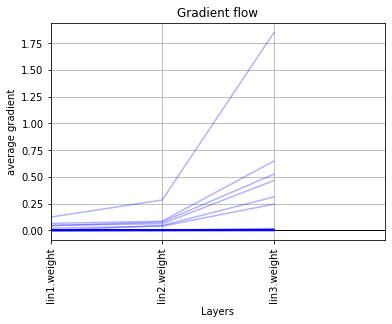

In [ ]:
epochs = 2001          # Number of epochs changed to 2001
steps = X.size(0)
Loss_method1 = []
Loss_method2 = []
Loss_method3 = []


for i in range(epochs):
    for j in range(steps):
        data_point = np.random.randint(X.size(0))
        x_var = Variable(X[data_point], requires_grad=False)
        y_var = Variable(Y[data_point], requires_grad=False)
        
        ########### Training Method-1 Model ###################################
        optimizer_1.zero_grad()
        y_hat_1 = model_1(x_var)
        loss_1 = loss_func.forward(y_hat_1, y_var)
        loss_1.backward()
        if i% 100 == 0:
          plot_grad_flow(model_1.named_parameters())
        optimizer_1.step()

    
    ## Collecting losses separately for each method
    Loss_method1.append(loss_1) 
    

    # Printing out Loss values for every 50 epochs
    if i % 50 == 0:
        print( "Epoch: {0}, Loss_method1: {1} ".format(i, loss_1.data.numpy()))

Text(0, 0.5, 'Loss')

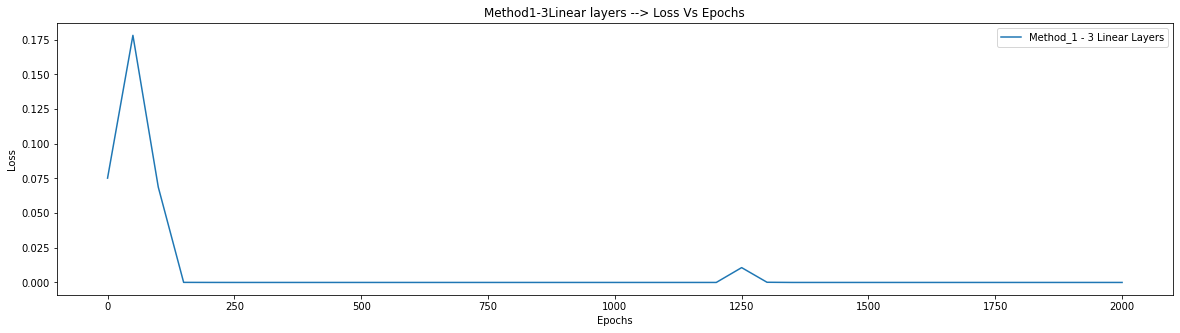

In [ ]:
# Plotting - Loss Vs Epochs
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 5]
plt.plot(range(0,2001,50), [x for x in Loss_method1[0::50]],label='Method_1 - 3 Linear Layers')
plt.legend()
plt.title("Method1-3Linear layers --> Loss Vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [ ]:

### Predictions ##########################
y_hat_method1 = model_1(X)
y_hat_method1

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor([[0.],
        [1.],
        [1.],
        [0.]], grad_fn=<AddmmBackward>)

In [ ]:
# Final Predictions comparison
y_hat_method1_n,Y_actual = y_hat_method1.detach().cpu().numpy(), Y.detach().cpu().numpy() # Detaching to convert to array and send it to Dataframe

import pandas as pd
predictions_df = pd.DataFrame(data = [Y_actual.reshape(-1), y_hat_method1_n.reshape(-1)]).T
predictions_df.columns=['Y_Actual','Y_method1_predi']
predictions_df

,Y_Actual,Y_method1_predi
0,0.0,0.0
1,1.0,1.0
2,1.0,1.0
3,0.0,0.0
